In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
data=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [23]:
# first we remove the Serial no which is not related to our dataset

In [24]:
data.drop(['Serial No.'], axis=1, inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [25]:
data.shape

(500, 8)

In [26]:
# we have 500 rows and 8 columns

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          485 non-null    float64
 1   TOEFL Score        490 non-null    float64
 2   University Rating  485 non-null    float64
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.4 KB


In [28]:
data.isnull().sum()

GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [29]:
# so we have some missing data in our dataset, we need to deal with them fist

In [30]:
data['GRE Score'].fillna(data['GRE Score'].mean(), inplace=True)
data['TOEFL Score'].fillna(data['TOEFL Score'].mean(), inplace=True)
data['University Rating'].fillna(data['University Rating'].mode()[0], inplace=True)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


In [31]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [32]:
# now we dont have any missing value 

In [33]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [34]:
# now we will check the distribution of the dataset

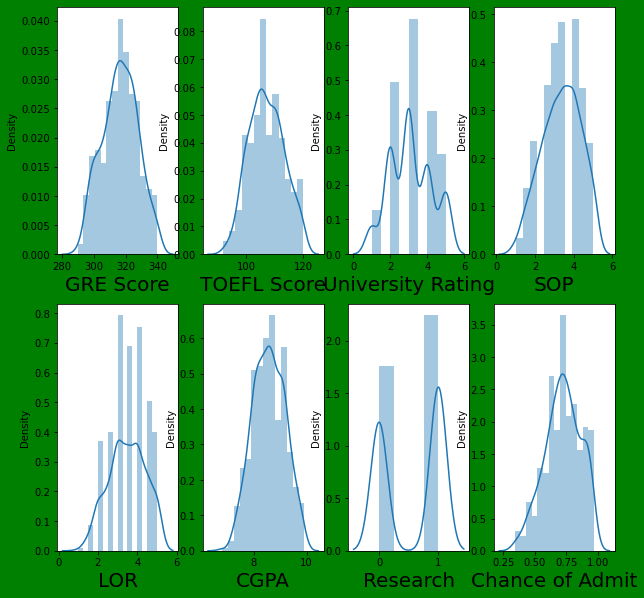

In [39]:
plt.figure(figsize=(10,10), facecolor='g')
plotnumber=1

for column in data:
    if plotnumber<=10:
        ax=plt.subplot(2,4, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.show()

In [40]:
# our data looks normally distributed

In [41]:
# Now we will chek the relation between deature and labels

In [48]:
x=data.drop(columns=['Chance of Admit'])
y=data['Chance of Admit']

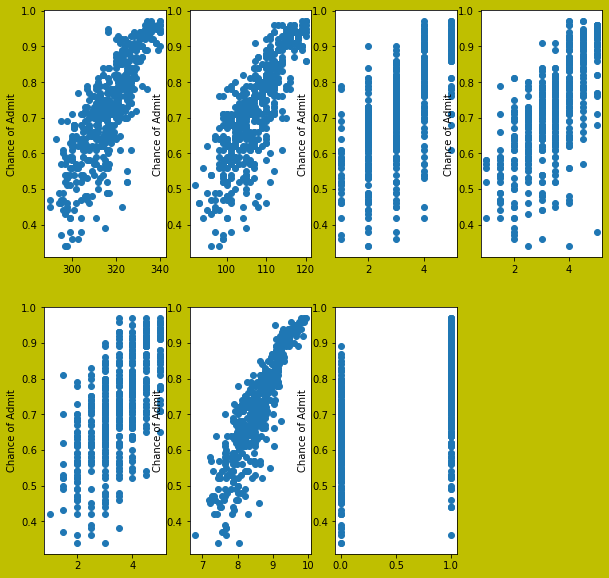

In [50]:
plt.figure(figsize=(10,10), facecolor='y')
plotnumber=1

for column in x:
    if plotnumber<=10:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column], y)
        plt.ylabel('Chance of Admit', fontsize=10)
        
    plotnumber+=1
plt.show()

In [51]:
# so every feature has the linear relation with label 

In [52]:
# now we will standardise the features

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
Scaler=StandardScaler()
x_scaled=Scaler.fit_transform(x)

In [56]:
# Now we will split the data into traning and testing

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
LR=LinearRegression()

In [63]:
LR.fit(x_train,y_train)

# we had done model traning

LinearRegression()

In [65]:
LR.score(x_train,y_train)

0.8192188216975007

In [67]:
y_pred=LR.predict(x_test)
y_pred

array([0.91549794, 0.79780583, 0.56898267, 0.71775964, 0.81689483,
       0.86282129, 0.47519953, 0.68479942, 0.82645825, 0.80782961,
       0.71999828, 0.72558172, 0.6547294 , 0.93593344, 0.82621178,
       0.51028007, 0.83881585, 0.60002347, 0.53354491, 0.5722761 ,
       0.66606346, 0.55246742, 0.7245475 , 0.79468633, 0.77988388,
       0.60502131, 0.94904667, 0.8481224 , 0.62611902, 0.74502747,
       0.55506108, 0.72944543, 0.54366791, 0.86249154, 0.65743608,
       0.73744654, 0.55489241, 0.92283489, 0.64534183, 0.71190917,
       0.9707614 , 0.57675155, 0.69030024, 0.85862589, 0.94103155,
       0.57920193, 0.9587776 , 0.83901444, 0.79878897, 0.92674681,
       0.89032619, 0.60332869, 0.70435009, 0.52506694, 0.95334745,
       0.59300881, 0.957072  , 0.73868036, 0.66415741, 0.50317515,
       0.63337355, 0.68191801, 0.59896002, 0.59072107, 0.44052522,
       0.58608795, 0.86805525, 0.89799506, 0.65747875, 0.70565644,
       0.61943535, 0.78576524, 0.69064741, 0.56015814, 0.55473

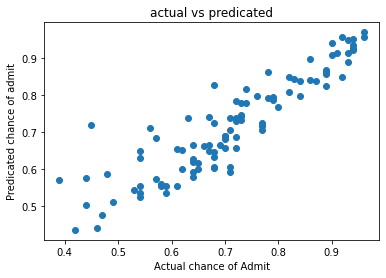

In [68]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual chance of Admit')
plt.ylabel('Predicated chance of admit')
plt.title('actual vs predicated')
plt.show()

In [69]:
LR.score(x_test,y_test)

0.8209327931998452

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error   

In [72]:
mean_absolute_error(y_test,y_pred)

0.04240473667387509

In [74]:
mean_squared_error(y_test,y_pred)

0.0036619243790631663

In [75]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.060513836261330896

In [76]:
from sklearn.linear_model import Lasso,Ridge,LassoCV,RidgeCV   

In [77]:
lassocv=LassoCV(alphas=None, max_iter=100, normalize=True)
lassocv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [78]:
alpha=lassocv.alpha_
alpha

3.289424517675492e-05

In [79]:
Lasso_reg=Lasso(alpha)
Lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.289424517675492e-05)

In [80]:
Lasso_reg.score(x_test,y_test)

0.8209458184794507

In [81]:
np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [82]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01), normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [83]:
alpha=ridgecv.alpha_
alpha

0.011

In [84]:
Ridge_reg=Ridge(alpha)
Ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.011)

In [85]:
Ridge_reg.score(x_test,y_test)

0.82093208387574